# Warren Co., 3-8818.00, CPT Analysis

In [1]:
import importlib
import csv

In [71]:
import main
importlib.reload(main) # Reload py file to get updates in file if resaved

<module 'main' from 'c:\\Users\\clayt\\Documents\\Python Scripts\\CPTPython\\main.py'>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# CPT Push Graphs

<i> To use the “rules of thumb” method, some helpful guidelines are to assume sands are identified when qt > 725 psi (5 MPa) and u2 ≈ uo, while the presence of intact clays are prevalent when qt < 725 psi and u2 > uo. The magnitude of porewater pressures help to indicate intact clays such as, soft (u2 ≈ 2·uo), firm (u2 ≈ 4·uo), stiff (u2 ≈ 8·uo), and hard (u2 ≈ 20·uo). Fissured overconsolidated clays tend to have negative u2 values such that u2 < 0. </i> (pg 6, Saftner, 2018)

## Hole 2001

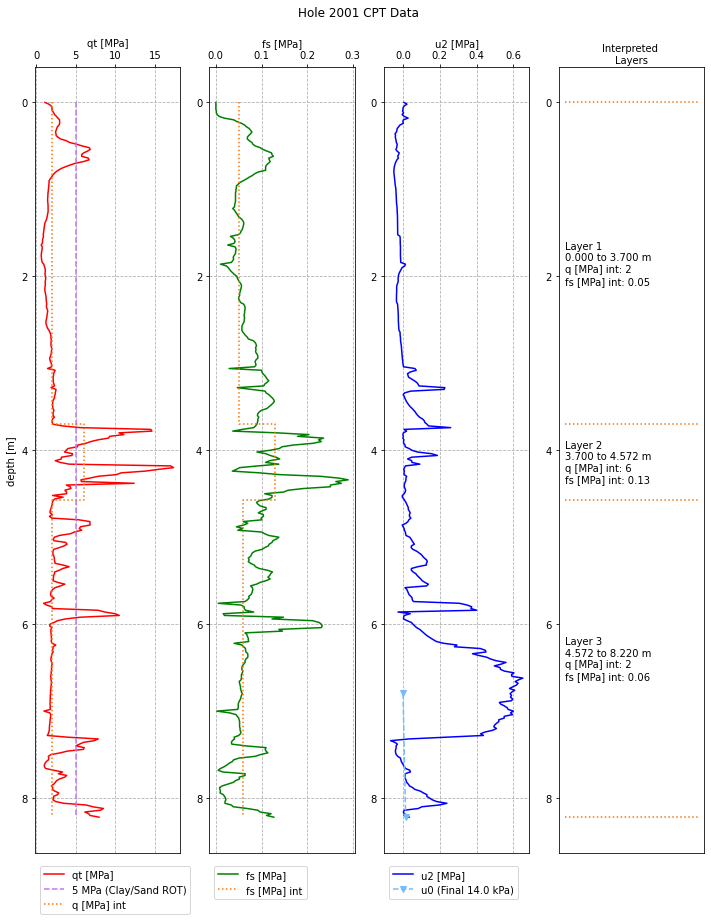

In [4]:
# Hole 2001
name = "Hole 2001"
with open("Warren Co., 3-8818.00\\push\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_2001 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 2001 Interpreted Layers
int_2001 = {'layer name':   ['Layer 1','Layer 2','Layer 3'],
            'layers [m]':   [3.700,4.572,8.220],
            'q [MPa] int': [2,6,2],
            'fs [MPa] int': [0.05,0.13,0.06]
           }

main.plot_push(push_2001['H [m]'],push_2001['qt [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
               title = 'Hole 2001 CPT Data',depth_unit='m',
               u0_start_m = 6.797,
               int_dict=int_2001,
               q_corrected=True)

In [53]:
# Hole 2001 Layer 1
qt = 2.0 #MPa
fs = 0.05 #MPa
depth_in_layer_1 = 3.700 #m

print("Hole 2001 Layer 1:")
# Calculate Estimated Unit Weight
gamma_total_metric = main.soil_weight_est(fs, 'MPa', weight_return_units='kN/m3')
gamma_total_english = main.soil_weight_est(fs, 'MPa', weight_return_units='pcf')
print("Estimated total unit weight:\n{:.2f} kN/m3\n{:.2f} pcf".format(gamma_total_metric,gamma_total_english))
# Calculated Total Pressure
total_pressure = main.effective_overburden_pressure(gamma_total_metric,depth)
total_pressure_MPa = main.convert(total_pressure,'kPa','MPa')
print("\nTotal pressure at {:.2f} m: {:.2f} kN/m2".format(depth_in_layer_1, total_pressure))
# Calculated Fr Index
Fr = main.normalized_friction_ratio(fs,qt,total_pressure_MPa)
print("\nFriction Ratio: {:.2f}%".format(Fr))
# Calculated CPT Material Index
Q_tn, Ic, n = main.cpt_material_index(qt,total_pressure_MPa,total_pressure_MPa,Fr)
SBTn = main.SBTn_zone(Fr,Q_tn)
print('\nCalculated Classification by\nRobertson 1990b:\n{}, {}'.format(SBTn[0],SBTn[1]))

Hole 2001 Layer 1:
Estimated total unit weight:
17.70 kN/m3
113.69 pcf

Total pressure at 3.70 m: 65.49 kN/m2

Friction Ratio: 2.58%

Calculated Classification by
Robertson 1990b:
Zone 5, Sandy Mixtures


In [65]:
# Hole 2001 Layer 2
qt = 6.0 #MPa
fs = 0.13 #MPa
depth_in_layer_2 = 0.872 #m
pressure_above = 65.49 #kN/m2

print("Hole 2001 Layer 2:")
# Calculate Estimated Unit Weight
gamma_total_metric = main.soil_weight_est(fs, 'MPa', weight_return_units='kN/m3')
gamma_total_english = main.soil_weight_est(fs, 'MPa', weight_return_units='pcf')
print("Estimated total unit weight:\n{:.2f} kN/m3\n{:.2f} pcf".format(gamma_total_metric,gamma_total_english))
# Calculated Total Pressure
total_pressure = main.effective_overburden_pressure(gamma_total_metric,depth_in_layer,above_pressure=65.49)
total_pressure_MPa = main.convert(total_pressure,'kPa','MPa')
print("\nTotal pressure at {:.2f} m: {:.2f} kN/m2".format(depth_in_layer_2 + depth_in_layer_1, total_pressure))
# Calculated Fr Index
Fr = main.normalized_friction_ratio(fs,qt,total_pressure_MPa)
print("\nFriction Ratio: {:.2f}%".format(Fr))
# Calculated CPT Material Index
Q_tn, Ic, n = main.cpt_material_index(qt,total_pressure_MPa,total_pressure_MPa,Fr)
SBTn = main.SBTn_zone(Fr,Q_tn)
print('\nCalculated Classification by\nRobertson 1990b:\n{}, {}'.format(SBTn[0],SBTn[1]))

Hole 2001 Layer 2:
Estimated total unit weight:
19.11 kN/m3
122.72 pcf

Total pressure at 4.57 m: 82.15 kN/m2

Friction Ratio: 2.20%

Calculated Classification by
Robertson 1990b:
Zone 5, Sandy Mixtures


In [74]:
# Hole 2001 Layer 3
qt = 2.0 #MPa
fs = 0.06 #MPa
depth_in_layer_3 = 3.648 #m
pressure_above = 82.15 #kN/m2
depth_below_water_table = 1.423 #m

print("Hole 2001 Layer 3:")
# Calculate Estimated Unit Weight
gamma_total_metric = main.soil_weight_est(fs, 'MPa', weight_return_units='kN/m3')
gamma_total_english = main.soil_weight_est(fs, 'MPa', weight_return_units='pcf')
print("Estimated total unit weight:\n{:.2f} kN/m3\n{:.2f} pcf".format(gamma_total_metric,gamma_total_english))
# Calculated Total Pressure
total_pressure = main.effective_overburden_pressure(gamma_total_metric,depth_in_layer=depth_in_layer_3,depth_below_water_table=depth_in_layer,above_pressure=pressure_above)
total_pressure_MPa = main.convert(total_pressure,'kPa','MPa')
print("\nTotal pressure at {:.2f} m: {:.2f} kN/m2".format(depth_in_layer_3 + depth_in_layer_2 + depth_in_layer_1, total_pressure))
# Calculated Fr Index
Fr = main.normalized_friction_ratio(fs,qt,total_pressure_MPa)
print("\nFriction Ratio: {:.2f}%".format(Fr))
# Calculated CPT Material Index
Q_tn, Ic, n = main.cpt_material_index(qt,total_pressure_MPa,total_pressure_MPa,Fr,n_override=True)
SBTn = main.SBTn_zone(Fr,Q_tn)
print('\nCalculated Classification by\nRobertson 1990b:\n{}, {}'.format(SBTn[0],SBTn[1]))

Hole 2001 Layer 3:
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 8.22 m: 139.14 kN/m2

Friction Ratio: 3.22%

Calculated Classification by
Robertson 1990b:
Zone 4, Silt Mix


## Hole 2002

In [ ]:
# Hole 2002
name = "Hole 2002"
with open("Warren Co., 3-8818.00\\push\\2020-11-09 Warren Co S-087-2020 Hole 2002 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_2001 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 2001 Interpreted Layers
int_2001 = {'layer name':   ['Layer 1',],
            'layers [m]':   [0.0,0.0],
            'q [MPa] int': [0.0,0.0],
            'fs [MPa] int': [0.0,0.0]
           }

main.plot_push(push_2001['H [m]'],push_2001['qt [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
               title = 'Hole 2002 CPT Data',depth_unit='m',
               u0_start_m = 7.346,
               int_dict=int_2001,
               q_corrected=True)

In [ ]:
push_2002['H [m]'][-1]

In [ ]:
# Hole 2003
name = "Hole 2003"
with open("Warren Co., 3-8818.00\\push\\2020-11-10 Warren Co S-087-2020 Hole 2003 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]
    
push_2003 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2}

# Hole 2001 Interpreted Layers
int_2002 = {'layer name':   ['layer 1'],
            'layers [m]':   [0,0],
            'qc [MPa] int': [0,0],
            'fs [MPa] int': [0,0]
           }

main.plot_push(push_2001['H [m]'],push_2001['qc [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
               title = 'Hole 2003 CPT Data',depth_unit='m',
               u0_start_m = 7.433,
               int_dict=int_2002)

In [ ]:
push_2003['H [m]'][-1]

## Dissipation Tests General Information

<i>"During a pause in penetration, any excess pore pressure generated around the cone will start to dissipate. The rate of dissipation depends upon the coefficient of consolidation, which in turn, depends on the compressibility and permeability of the soil. The rate of dissipation also depends on the diameter of the probe. A dissipation test can be performed at any required depth by stopping the penetration and measuring the decay of pore pressure with time. It is common to record the time to reach 50% dissipation (t50), as shown in Figure 18. If the equilibrium pore pressure is required, the dissipation test should continue until no further dissipation is observed. This can occur rapidly in sands, but may take many hours in plastic clays. Dissipation rate increases as probe size decreases."</i> (pg 18, Robertson and Robertson, 2012)

There can be localized dissipation of pore pressure before general dissipation of pore pressure. So in stiff clay there can be an increase before there is a decrease from pore pressure at the u2 location.

Important conversions to keep in mind:
- 1 foot head ~ 0.003 MPa ~ 3 kPa
- 1 meter head = 9.81 kPa
- 1 foot head = 0.433 psi

## Coefficient of Consolidation

<img src="img/coeff of consolidation.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Hydraulic Conductivity

<img src="img/hydraulic conductivity.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Warren Co., 3-8818.00, Specific Dissipation Testing

In [ ]:
Hole2001 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.DPT')
Hole2002 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2002 Test 1.DPT')
Hole2003 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-10 Warren Co S-087-2020 Hole 2003 Test 1.DPT')

In [ ]:
# Dissipation Tests
for hole in [Hole2001,Hole2002,Hole2003]:
    print('Hole {}'.format(hole['Hole Number'][0]))
    for k in hole['Dissipation Test Depth (m)']:
          print('{} (m) dissapation test'.format(k))

## Summary of Dissipation Data

Hole | Depth<br/>(m) | Depth<br/>(ft) | u0 <br/>(kPa) | est. water<br/>depth <br/>(ft) | t50<br/>(secs) | t50<br/>(kPa) |
:---: | :---: |:---: | :---: |:---: | :---: | :---:|
2001|1.527|5.0|0|-1|125|-16|
2001|3.047|10.0|0|-1|375|115|
2001|4.870|16.0|0|-1|20|2|
2001|6.202|20.3|0|-1|150|300|
2001|7.700|25.3|9|22.3|25|37|
2002|3.030|9.9|0|-1|250|100|
2002|3.590|11.8|0|-1|162|262|
2002|4.650|15.3|0|-1|162|82|
2002|6.130|20.1|0|-1|150|325|
2002|7.652|25.1|2.5|24.3|N/A|N/A|
2002|8.660|28.4|13|24.1|25|22|
2003|3.090|10.1|0|-1|300|230|
2003|6.127|20.1|0|-1|N/A|N/A|
2003|7.717|25.3|9|22.3|30|20|
2003|9.790|32.1|29.4|22.3|3750|202|

## Interpretation of Dissipation Data

### Hole 2001

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'1.527','Hole 2001 Diss Test at 1.527 (m)',0,-31,0,500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Notes:
The dissipation test was not run long enough to get a t50 value. The pore pressure started negative and this test was above the water table. No usable information about the permiability of the soil could be obatined from this data.

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'3.047','Hole 2001 Diss Test at 3.047 (m)',0,230,0,1500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

The test looks to be run just long enough to interprete a t50 value of 375 seconds.

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2001,'4.870','Hole 2001 Diss Test at 4.870 (m)',0,3,0,80

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'6.202','Hole 2001 Diss Test at 6.202 (m)',0,600,0,600
# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = [Hole2001,'7.700','Hole 2001 Diss Test at 7.700 (m)',9,65,9,100]

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2002

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2002,'3.030','Hole 2002 Diss Test at 3.030 (m)',0,200,0,1000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'3.590','Hole 2002 Diss Test at 3.590 (m)',0,525,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'4.650','Hole 2002 Diss Test at 4.650 (m)',0,165,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'6.130','Hole 2002 Diss Test at 6.130 (m)',0,650,0,600

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'7.652','Hole 2002 Diss Test at 7.652 (m)',2.5,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'8.660','Hole 2002 Diss Test at 8.660 (m)',13,30,13,100

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2003

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'3.090','Hole 2003 Diss Test at 3.090 (m)',0,460,0,1200

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'6.127','Hole 2003 Diss Test at 6.127 (m)',0,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'7.717','Hole 2003 Diss Test at 7.717 (m)',9,30,9,120

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

In [ ]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'9.790','Hole 2003 Diss Test at 9.790 (m)',29.4,375,29.4,15000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)